<a href="https://colab.research.google.com/github/vivianecunha/IGTI-Bootcamp-Cientista-de-Dados/blob/master/M%C3%B3dulo%2001/Trabalho_Pr%C3%A1tico_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático Módulo 01

Considede um dataset gerado pelo comando "make_blobs(n_samples=500, centers=20, random_state=999)" e execute o algorítimo K-means.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

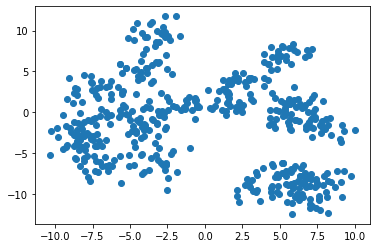

In [9]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

**Pergunta 4**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

*   [ 2.40603415 6.29715718]
*   **[ 0.02618523 -1.30384304]**
*   [1.9050166 4.91200285]
*   [1.03796387 -5.49096674]

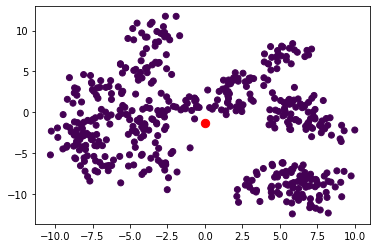

In [10]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

In [11]:
# Coordenada do centróide para cluster = 1:
print(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

[0.02618523] [-1.30384304]


**Pergunta 5**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

*   1068.2049059143994
*   34737.56779526727
*   **31547.372471390485**
*   61186.525771621105

**Pergunta 6**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

*   6005.101775346179
*   **4717.404091931214**
*   1853.7783832527882
*   9464.847250570496

In [16]:
# Qual o WCSS para 1 e 5 clusters?

for i in [1, 5]:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    print(kmeans.inertia_)

31547.372471390485
4717.433959667094


**Pergunta 7**

Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

*   3
*   4
*   7
*   **5**

4


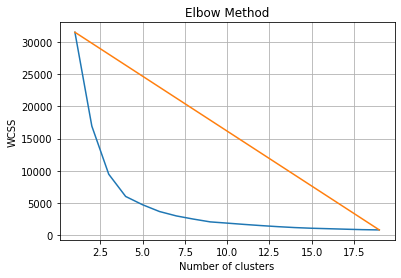

In [18]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [20]:
from math import sqrt

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

print(optimal_number_of_clusters(wcss))

4
